In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

Dataset used : GPS Trajectory by UCI
link : https://archive.ics.uci.edu/ml/datasets/GPS+Trajectories

In [46]:
df = pd.read_csv("datasets/go_trackspoints.csv")

### 1. Exploratory Data Analysis

In [47]:
df.head()

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


In [48]:
df.shape

(18107, 5)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18107 entries, 0 to 18106
Data columns (total 5 columns):
id           18107 non-null int64
latitude     18107 non-null float64
longitude    18107 non-null float64
track_id     18107 non-null int64
time         18107 non-null object
dtypes: float64(2), int64(2), object(1)
memory usage: 707.4+ KB


In [50]:
df.describe()

,id,latitude,longitude,track_id
count,18107.000000,18107.000000,18107.000000,18107.000000
mean,9958.405920,-10.998744,-37.111923,13296.340697
std,5748.673657,1.329848,0.938015,18040.767448
min,1.000000,-27.603175,-48.632918,1.000000
25%,4736.500000,-10.944041,-37.073069,33.000000
50%,10376.000000,-10.922000,-37.057784,136.000000
75%,15004.500000,-10.904268,-37.050190,37992.000000
max,19569.000000,-10.292845,-36.493357,38092.000000


* **No missing values**
* **No invalid latitude and longitude values**

In [51]:
print("Number of trips : ", df["track_id"].unique().shape)
print("Number of data points : ", df["id"].unique().shape)

Number of trips :  (163,)
Number of data points :  (18107,)


**From observing the columns we can see that :**
* **We have 18107 data points for 163 trips**
* **Latitudes and Longitudes are in Decimal Degrees format**
* **Data points are 5 seconds apart**

In [52]:
print("Number of unique latitude positions : ", df["latitude"].unique().shape)
print("Number of unique longitude positions : ", df["longitude"].unique().shape)

Number of unique latitude positions :  (14133,)
Number of unique longitude positions :  (14157,)


## 2. Analyzing single trips

We will consider trip number "1" and try to make some analyses.

In [53]:
# List of unique trips
len(df["track_id"].unique())

163

In [54]:
# Selecting data points from trip 1 only
trip_filter  = df["track_id"] == 1

In [55]:
df_trip = df[trip_filter]
df_trip.shape

(90, 5)

### 2.1 Visualize the trip route

This is the actual representaion of the trip in 2d format

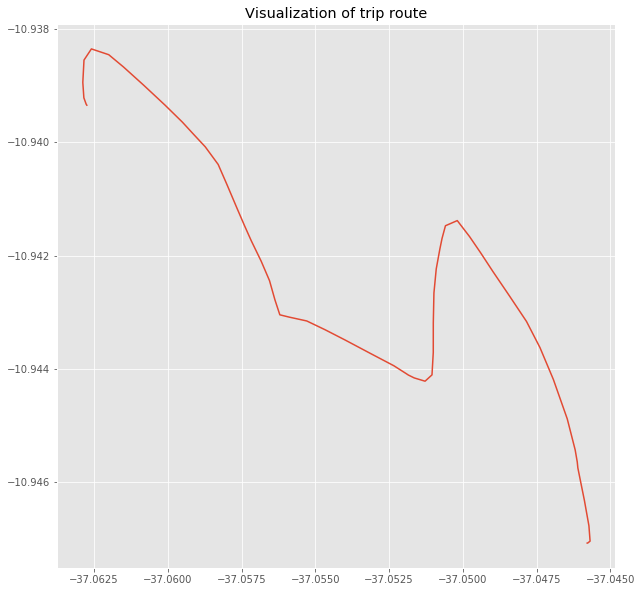

In [56]:
plt.figure(figsize=(10,10))
plt.title("Visualization of trip route")
plt.plot(df_trip["longitude"], df_trip["latitude"])
plt.show()

### 2.2 Find out distance between start and end point of the trip

finding out meters from degrees : https://sciencing.com/convert-distances-degrees-meters-7858322.html

In [57]:
# Number of data points in trip 1
len(df_trip)

90

In [58]:
# Some details about the start and end points of the trip
start = df_trip[["latitude","longitude"]].iloc[0]
end = df_trip[["latitude","longitude"]].iloc[89]
print(start)
print(end)

latitude    -10.939341
longitude   -37.062742
Name: 0, dtype: float64
latitude    -10.947085
longitude   -37.045783
Name: 89, dtype: float64


In [59]:
# Step 1: Find out degrees of separation of latitudes and longitudes
DOF_lat = start["latitude"] - end["latitude"]
DOF_long = start["longitude"] - end["longitude"]

# Step 2: Convert degrees of separation to distances (meters)
dist_lat = DOF_lat * 111139
dist_long = DOF_long * 111139

# Step 3: Use pythagoras theorem to find the distance
final = np.sqrt((dist_lat*dist_lat) + (dist_long*dist_long))

In [60]:
print("The distance between start and end point of the trip is : ", final, "meters")

The distance between start and end point of the trip is :  2072.03340276235 meters


### 2.3 Find out total distance covered in the trip

We have data points at the interval of 5 seconds. So we will have to find out the distances between every 2 points and then add them.
To simplify things we will define a function which converts latitude and longitude to meters as we did in the above steps.

In [61]:
# Function to convert degrees to meters
def find_distance(start_lat, start_long, end_lat, end_long):
    
    DOF_lat = start_lat - end_lat
    DOF_long = start_long - end_long
    
    dist_lat = DOF_lat * 111139
    dist_long = DOF_long * 111139
    
    dist = np.sqrt((dist_lat*dist_lat) + (dist_long*dist_long))
    
    return dist
    

In [62]:
# Lets verify the function works properly
find_distance(-10.939341,-37.062742,-10.947085,-37.045783)

2072.011376406596

In [63]:
# Find out distances between all data points and add them
points_no = len(df_trip)
total_dist = 0

for i in range(points_no - 1):
    current_lat = df_trip["latitude"].iloc[i]
    current_long = df_trip["longitude"].iloc[i]
    next_lat = df_trip["latitude"].iloc[i+1]
    next_long = df_trip["longitude"].iloc[i+1]
    
    delta = find_distance(current_lat,current_long,next_lat,next_long)
    
    total_dist = total_dist + delta

In [64]:
direct_dist = find_distance(df_trip["latitude"].iloc[0], df_trip["longitude"].iloc[0], df_trip["latitude"].iloc[89], df_trip["longitude"].iloc[89])
total_time = len(df_trip) * 5

In [66]:
print("Time taken for the trip : ", (total_time/60), "minutes")
print("Direct distance between the start and end location : ", direct_dist, "meters")
print("Distance covered by the car in the trip : ", total_dist, " meters")
print("Average speed of the car : ", ((total_dist/1000) / (total_time/3600)) , "km/hr")

Time taken for the trip :  7.5 minutes
Direct distance between the start and end location :  2072.03340276235 meters
Distance covered by the car in the trip :  2819.20692842891  meters
Average speed of the car :  22.55365542743128 km/hr


## 3. Analyzing multiple trips

We will have to automate all the things we did in the above steps so we can analyze all the trips in one go

In [22]:
# A function to calculate actual distance covered, total time and average speed of the trip

def find_trip_details(trip):
    trip_filter = df["track_id"] == trip
    df_temp = df[trip_filter]
    
    points_no = len(df_temp)
    total_dist = 0
    
    if(points_no > 1):     #Some values were giving error so had to add this condition
        
        total_dist = 0
        
        for i in range(points_no - 1):
            current_lat = df_temp["latitude"].iloc[i]
            current_long = df_temp["longitude"].iloc[i]
            next_lat = df_temp["latitude"].iloc[i+1]
            next_long = df_temp["longitude"].iloc[i+1]
    
            delta = find_distance(current_lat,current_long,next_lat,next_long)
    
            total_dist = total_dist + delta
        
            total_time = (5 * points_no)
        
            average_speed = ((total_dist/1000) / (total_time/3600))
    
        return total_dist, (total_time/60), average_speed
    
    if(points_no <= 1):
        
        return 0, 0, 0
    


In [23]:
# Make a dataframe which contains details about each individual trips and fill the data
trips = df["track_id"].unique()
df_trips = pd.DataFrame(columns=["trip id", "total distance","total time","average speed"])

for trip in trips:
    
    if trip != 14:
        
        total_dist, total_time, average_speed = find_trip_details(trip)
        #print(trip)
    
        df_trips = df_trips.append({"trip id":trip, "total distance":total_dist, "total time":total_time, "average speed":average_speed},ignore_index=True)

#Generalize

In [24]:
df_trips.head()

,trip id,total distance,total time,average speed
0,1.0,2819.206928,7.500000,22.553655
1,2.0,5566.947988,9.416667,35.470819
2,3.0,879.867561,1.916667,27.543680
3,4.0,7576.887364,10.750000,42.289604
4,8.0,455.555321,1.666667,16.399992


**Now we have a dataframe which contains all the details of trips we calculated using only the latitutes and longitudes of the car. Lets see some statistics and create some visualizations.**

In [25]:
df_trips.describe()

,trip id,total distance,total time,average speed
count,162.000000,162.000000,162.000000,162.000000
mean,15703.907407,5406.385673,9.309156,39.187201
std,18661.396963,7852.970235,10.037751,89.831548
min,1.000000,0.000000,0.000000,0.000000
25%,49.250000,22.677325,0.937500,2.400169
50%,158.500000,4097.207171,6.958333,24.946817
75%,37991.500000,7542.699931,13.520833,39.685678
max,38092.000000,58117.333347,53.833333,984.901101


* **We can see we have some outliers in average speed. The max average speed is 984 km/hr which is not possible. Lets investigate that.**
* **We should also remove trips with zero time and distance as they dont give us any valuable information.**

In [26]:
df_trips = df_trips.sort_values(by="average speed", ascending = False)
df_trips.head()

,trip id,total distance,total time,average speed
107,37961.0,8207.509177,0.500000,984.901101
18,25.0,8888.784457,1.333333,399.995301
46,58.0,31631.465049,5.000000,379.577581
41,50.0,18821.654503,7.083333,159.430485
40,49.0,18821.654503,7.083333,159.430485


**Lets clean this data by keeping the upper cap for the speed as 160 (km/hr). Once this data is cleaned we can proceed with the visualizations.**

In [27]:
speed_filter = df_trips["average speed"] <= 160
df_trips = df_trips[speed_filter]
time_filter = df_trips["total time"] != 0
df_trips = df_trips[time_filter]
distance_filter = df_trips["total distance"] != 0
df_trips = df_trips[distance_filter]

In [28]:
df_trips.describe()

,trip id,total distance,total time,average speed
count,149.000000,149.000000,149.000000,149.000000
mean,15284.275168,5551.051815,10.074385,30.764111
std,18581.441041,7765.827441,10.104596,29.963071
min,1.000000,0.321584,0.166667,0.057906
25%,47.000000,172.185084,2.166667,4.153762
50%,156.000000,4685.231078,7.916667,25.605968
75%,37989.000000,7556.898376,14.250000,39.722910
max,38092.000000,58117.333347,53.833333,159.430485


**No outliers and invalid values present!**

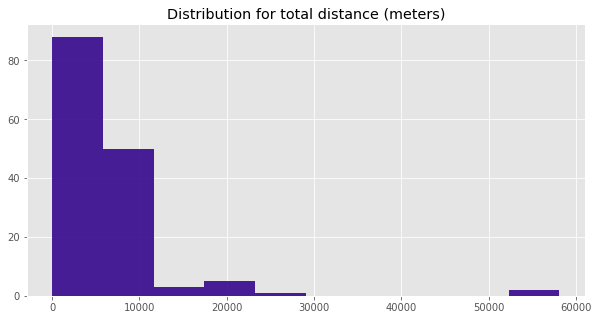

In [29]:
color = (np.random.random(),np.random.random(),np.random.random(),np.random.uniform(0.9,0.99))
plt.figure(figsize=(10,5))
plt.title("Distribution for total distance (meters)")
plt.hist(df_trips["total distance"],color=color)
plt.show()

#Convert to kms

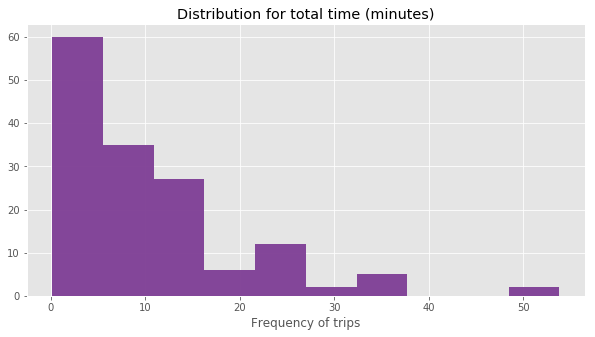

In [67]:
color = (np.random.random(),np.random.random(),np.random.random(),np.random.uniform(0.9,0.99))
plt.figure(figsize=(10,5))
plt.title("Distribution for total time (minutes)")
plt.hist(df_trips["total time"],color=color)
plt.xlabel("Frequency of trips")
plt.show()

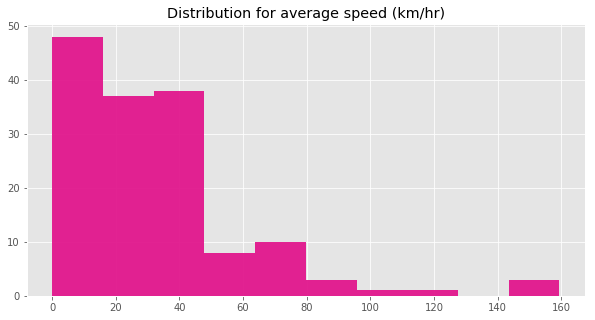

In [31]:
color = (np.random.random(),np.random.random(),np.random.random(),np.random.uniform(0.9,0.99))
plt.figure(figsize=(10,5))
plt.title("Distribution for average speed (km/hr)")
plt.hist(df_trips["average speed"],color=color)
plt.show()

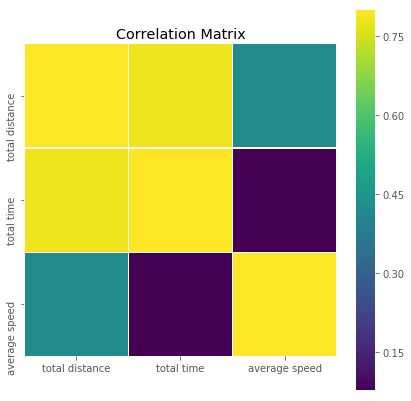

In [32]:
plt.figure(figsize=(7,7))
plt.title("Correlation Matrix")
sns.heatmap(df_trips[["total distance", "total time", "average speed"]].corr(), cmap="viridis", square = True, linewidths=0.1, vmax=0.8)
plt.show()

We can observe that :
* There is no negative correlation between any of the parameters. This means that increasing value of any of the parameters the rest of them will either increase or not increase.
* **High** Correlation between **total time** and **total distance** (expected).
* **Mild** Correlation between **average speed** and **total distance**.
* **Very Low** correlation between **average speed** and **total time** (since short trips are also present in data).